### IMPORT LIBRARIES

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

### READ DATASET

In [5]:
data = pd.read_csv('headbrain.csv')
print(data.shape)

(237, 4)


In [7]:
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


### PLOT

In [9]:
X=data['Head Size(cm^3)'].values
Y=data['Brain Weight(grams)'].values

In [12]:
mean_of_X=np.mean(X)
mean_of_Y=np.mean(Y)
n=len(X)

In [13]:
print(n)

237


### LINEAR REGRESSION CALC
#### WITH FORMULA

In [19]:
numer = 0
denom = 0
for i in range(n):
    numer += (X[i]-mean_of_X) * (Y[i]-mean_of_Y)
    denom += (X[i]-mean_of_X) ** 2
b1 = numer / denom
b0 = mean_of_Y - ( b1 * mean_of_X)

In [20]:
print(b1,b0)

0.26342933948939945 325.57342104944223


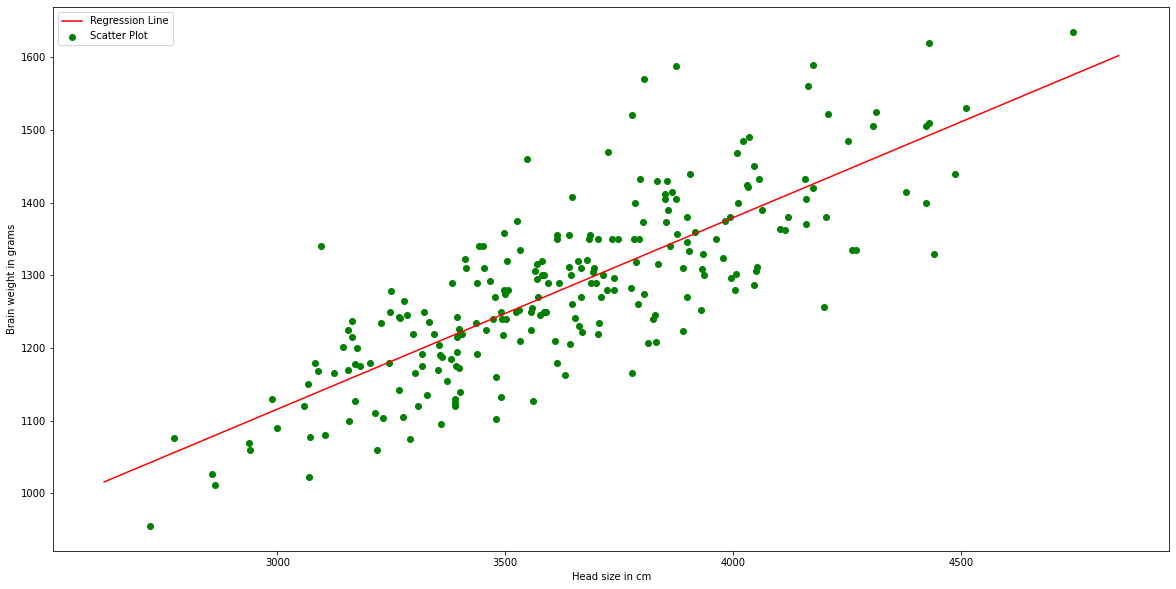

In [30]:
max_of_X = np.max(X) + 100
min_of_X = np.min(X) - 100

x=np.linspace(min_of_X, max_of_X, 1000)
y=b0 + b1 * x

plt.plot(x,y, color='red', label='Regression Line')
plt.scatter(X,Y,color='green', label='Scatter Plot')

plt.xlabel('Head size in cm')
plt.ylabel('Brain weight in grams')
plt.legend()
plt.show()

In [24]:
ss_t = 0
ss_r = 0
for i in range(n):
    y_pred = b0 + b1 * X[i]
    ss_t += (Y[i] - mean_of_Y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
print(r2)

0.6393117199570003


### LINEAR REGRESSION CALC
#### WITH SCIKIT LEARN

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X= X.reshape((n,1))
reg = LinearRegression()
reg=reg.fit(X,Y)
Y_pred=reg.predict(X)
r2_score=reg.score(X,Y)
print(r2_score)

0.639311719957
